In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as ani
import matplotlib.cm as cm 




# allows animation features within notebook
%matplotlib notebook

In [11]:
timesteps = np.arange(0,5,0.01)
vector = np.array([0.0,0.0,0.0])
center = np.zeros(np.shape(vector))

In [12]:

class Particle:
    def __init__(self, timesteps, mass=1, charge=1, force=np.zeros((timesteps.size,3)), dt=timesteps.size / 1000):
        self.mass = mass
        self.charge = charge
        self.timesteps = timesteps
        self.force = force
        self.dt = dt

        self.pos = np.zeros(np.shape(vector))
        self.vel = np.zeros(np.shape(vector))
        self.accel = np.zeros(np.shape(vector))
        self.force = np.zeros(np.shape(vector))

  

In [25]:
def make_particle_list(particle_count):
    particle_list = []
    for i in range(particle_count):
        particle_list.append(Particle(timesteps))
    return(particle_list)
        
def set_positions(particle_list):
    for i in range(len(particle_list)):
        particle_list[i].pos = np.array([i/10+0.1, 0, 0])
        
def calc_forces(particle_list):  # calcs forces between particles
    for i in range(len(particle_list)):
        for j in range(i+1, len(particle_list)):
            sep = particle_list[i].pos - particle_list[j].pos
            particle_list[i].force += (sep / (np.linalg.norm(sep)) ** 3)*0.00001
            particle_list[j].force -= (sep / (np.linalg.norm(sep)) ** 3)*0.00001
            
def update(particle_list):    
    for i in range(len(particle_list)):            
        particle_list[i].accel = particle_list[i].force / particle_list[i].mass
        particle_list[i].vel+= particle_list[i].accel * particle_list[i].dt
        particle_list[i].pos+= particle_list[i].vel * particle_list[i].dt
                            
def make_placeholder(timesteps):
    return np.zeros((timesteps.size,3))

def set_initial_conditions(particle_list, i, vel, pos):
    particle_list[i].pos = pos
    particle_list[i].vel = vel
    
def sphere_constraint(particle_list, center):
    for i in range(len(particle_list)):
        radius = (particle_list[i].pos - center)
        particle_list[i].force+= np.dot(particle_list[i].force,radius) 

In [26]:
test_list = make_particle_list(3)
set_positions(test_list)
#print(test_list[2].force)

def run_sim(particle_list,timesteps):    
    vel = make_placeholder(timesteps)
    pos = make_placeholder(timesteps)        
    for inum, timestep in enumerate(timesteps):        
        vel[inum] = particle_list[0].vel
        pos[inum] = particle_list[0].pos
        
        calc_forces(particle_list)
        sphere_constraint(particle_list, center)
        update(particle_list)
    return vel,pos

        
    

C:\Users\Ansh.DESKTOP-NASBRC7\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Ansh.DESKTOP-NASBRC7\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


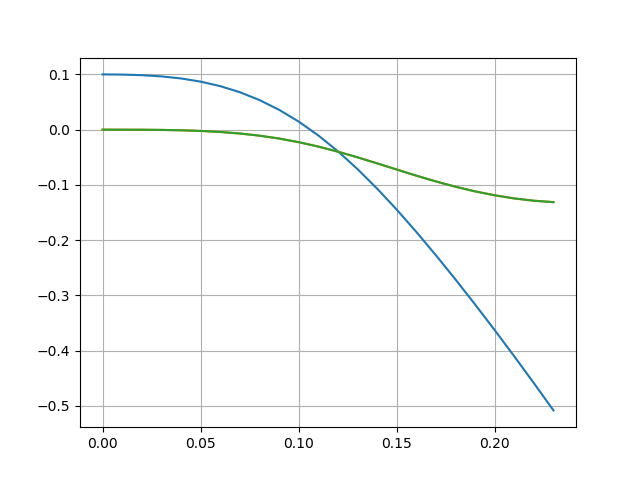

In [27]:
vel,pos = run_sim(test_list, timesteps)
plt.plot(timesteps,pos)
plt.grid()


In [ ]:
abc = np.array([;,;,;])
print(abc)